# News

In [1]:
from newsapi import NewsApiClient
# from kafka import KafkaProducer
from datetime import datetime
from textblob import TextBlob
import json
import requests

In [2]:
# API key for News API
news_api_key = "8b331c71e2294e45bfae1d93054177df"

# Initialize News API client
newsapi = NewsApiClient(api_key=news_api_key)

In [3]:
# Parameters
query = "Nvidia"
start_date = "2025-05-05"
end_date = "2025-05-30"

In [4]:
# Fetch news articles
news_articles = newsapi.get_everything(
    q=query,
    from_param=start_date,
    to=end_date,
    language="en",
    sort_by="relevancy"
)


In [5]:
df_news = []

# Process and send articles
for article in news_articles['articles']:
    published_date = datetime.strptime(article['publishedAt'], "%Y-%m-%dT%H:%M:%SZ").strftime('%Y-%m-%d')
    message = {
        "date": published_date,
        "source": article['source']['name'],
        "title": article['title'],
        "description": article['description'] or "No description provided",
        "polarity": TextBlob(article['description'] or "").sentiment.polarity # Polarity ranges from -1 (negative) to 1 (positive)
    }
    df_news.append(message)
    print(f"{message}")


{'date': '2025-05-14', 'source': 'The Verge', 'title': 'Nvidia’s flattery of Trump wins reversal of AI chip limits and a Huawei clampdown', 'description': 'Nvidia’s efforts to suck up to the Trump administration have seemingly paid off, with the US now lifting export limits on US-made AI chips and cracking down on anyone using Huawei’s emerging alternatives. The announcements come as Nvidia CEO Jensen Huang join…', 'polarity': -0.15555555555555559}
{'date': '2025-05-08', 'source': 'The Verge', 'title': 'Lenovo’s flagship gaming laptop has a 2D / 3D screen and carbon fiber lid', 'description': 'Lenovo is announcing a new 10th-generation Legion 9i gaming laptop coming soon to China and scheduled for the fall in North America. The 18-inch behemoth is packed with top-end specs, including the option for a 4K-capable 2D / 3D screen, Nvidia RTX 5090 GPU, …', 'polarity': 0.13636363636363635}
{'date': '2025-05-14', 'source': 'The Verge', 'title': 'Switch 2 spec breakdown digs into its processor

# Stocks

In [6]:
# Polygon.io API key
api_key = "XjYt_dkqf8RGZoPqstKOCrTozpC5CtsI"

In [7]:
# Stock symbol for Nvidia
symbol = "NVDA"

# Date range for the stock data
start_date = "2025-05-05"
end_date = "2025-05-30"

In [8]:
# API URL to fetch the stock data from Polygon.io
url = f"https://api.polygon.io/v2/aggs/ticker/{symbol}/range/1/day/{start_date}/{end_date}?apiKey={api_key}"

In [9]:
# Make a request to Polygon.io API
response = requests.get(url)
data = response.json()

In [10]:
df_stocks = []

# Check if the response contains results
if 'results' in data:
    # Iterate through the data for each day
    for item in data['results']:
        # Get stock data: open, close, high, low values
        timestamp = item['t']  # Timestamp (in milliseconds)
        open_price = item['o']  # Open price
        close_price = item['c']  # Close price
        high_price = item['h']  # High price
        low_price = item['l']  # Low price
        
        # Convert timestamp to a readable date format
        date_str = datetime.utcfromtimestamp(timestamp / 1000).strftime('%Y-%m-%d')

        # Classify the stock movement based on open and close prices
        if close_price > open_price:
            movement_class = 1  # Up
        else:
            movement_class = 0  # Down

        # Prepare the message for Kafka
        message = {
            "date": date_str,
            "symbol": symbol,
            "open": open_price,
            "close": close_price,
            "high": high_price,
            "low": low_price,
            "movement_class": movement_class  # Adding classifier: 1 for up, 0 for down
        }

        df_stocks.append(message)

        print(f"{message}")
else:
    print("No data found or error with the API request")


{'date': '2025-05-05', 'symbol': 'NVDA', 'open': 112.905, 'close': 113.82, 'high': 114.665, 'low': 112.66, 'movement_class': 1}
{'date': '2025-05-06', 'symbol': 'NVDA', 'open': 111.48, 'close': 113.54, 'high': 114.74, 'low': 110.822, 'movement_class': 1}
{'date': '2025-05-07', 'symbol': 'NVDA', 'open': 113.045, 'close': 117.06, 'high': 117.68, 'low': 112.2818, 'movement_class': 1}
{'date': '2025-05-08', 'symbol': 'NVDA', 'open': 118.25, 'close': 117.37, 'high': 118.68, 'low': 115.85, 'movement_class': 0}
{'date': '2025-05-09', 'symbol': 'NVDA', 'open': 117.35, 'close': 116.65, 'high': 118.23, 'low': 115.21, 'movement_class': 0}
{'date': '2025-05-12', 'symbol': 'NVDA', 'open': 121.97, 'close': 123, 'high': 123, 'low': 120.28, 'movement_class': 1}
{'date': '2025-05-13', 'symbol': 'NVDA', 'open': 124.98, 'close': 129.93, 'high': 131.2189, 'low': 124.47, 'movement_class': 1}
{'date': '2025-05-14', 'symbol': 'NVDA', 'open': 133.195, 'close': 135.34, 'high': 135.435, 'low': 131.68, 'movement

# Visualizations

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# Convert results to DataFrame
df_news = pd.DataFrame(df_news)

# Drop the rows with '[Removed]'
df_news = df_news[df_news['source'] != '[Removed]']

# Display the DataFrame
df_news.head()

,date,source,title,description,polarity
0,2025-05-14,The Verge,Nvidia’s flattery of Trump wins reversal of AI...,Nvidia’s efforts to suck up to the Trump admin...,-0.155556
1,2025-05-08,The Verge,Lenovo’s flagship gaming laptop has a 2D / 3D ...,Lenovo is announcing a new 10th-generation Leg...,0.136364
2,2025-05-14,The Verge,Switch 2 spec breakdown digs into its processo...,Nintendo’s Switch 2 specs page is light on det...,0.134091
3,2025-05-15,Wired,The Middle East Has Entered the AI Group Chat,The UAE and Saudi Arabia are investing billion...,0.000000
4,2025-05-29,The Verge,Tested: Nvidia’s GeForce Now just breathed new...,I don't want gaming to become another streamin...,0.178571


In [13]:
# Number of rows
df_news.shape[0]

98

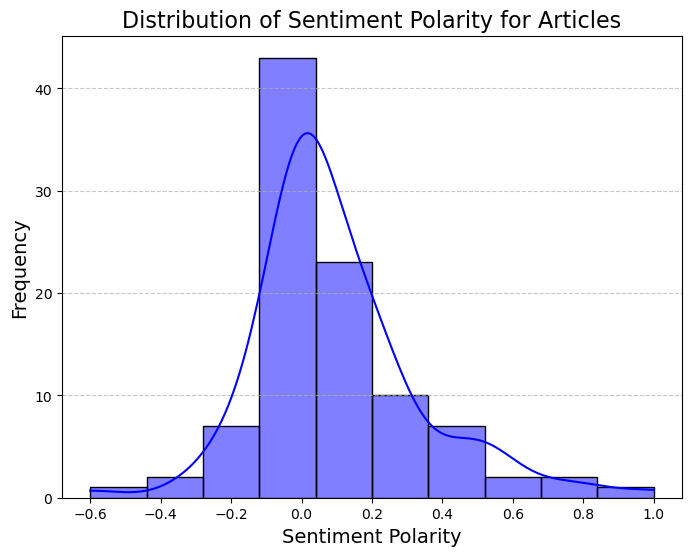

In [14]:
# Generate a histogram for sentiment polarity
plt.figure(figsize=(8, 6))
sns.histplot(df_news['polarity'], bins=10, kde=True, color='blue')

# Customize the plot
plt.title('Distribution of Sentiment Polarity for Articles', fontsize=16)
plt.xlabel('Sentiment Polarity', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [15]:
df_stocks = pd.DataFrame(df_stocks)

In [16]:
df_stocks['date'] = pd.to_datetime(df_stocks['date'])

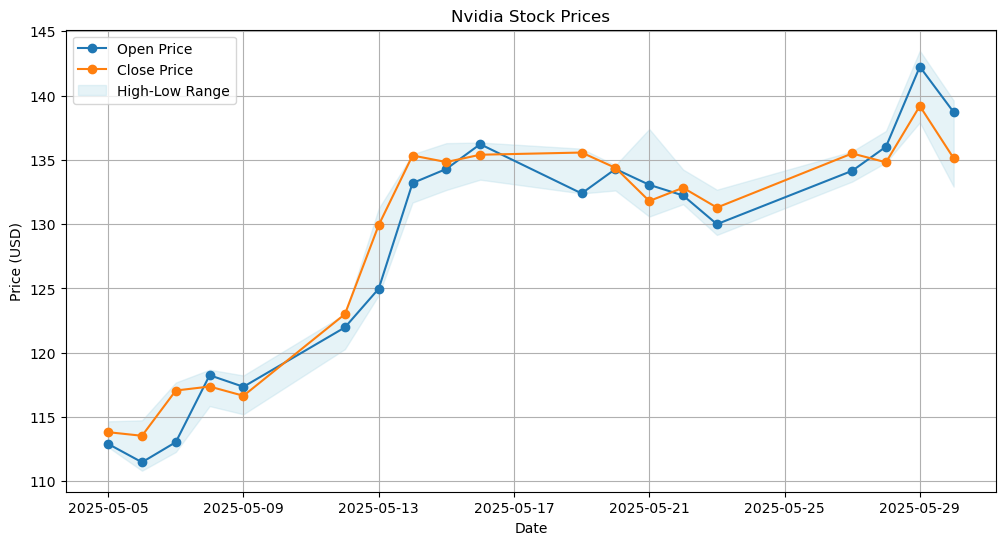

In [17]:
# Plot stock prices
plt.figure(figsize=(12, 6))
plt.plot(df_stocks['date'], df_stocks['open'], label='Open Price', marker='o')
plt.plot(df_stocks['date'], df_stocks['close'], label='Close Price', marker='o')
plt.fill_between(df_stocks['date'], df_stocks['low'], df_stocks['high'], color='lightblue', alpha=0.3, label='High-Low Range')
plt.title("Nvidia Stock Prices")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.show()

In [18]:
print(df_news.shape)
print(df_stocks.shape)


(98, 5)
(19, 7)


In [19]:
df_stocks.to_csv("output.csv", index=False)

In [20]:
aggregated_polarity = df_news.groupby("date")["polarity"].mean().reset_index()

# Rename columns for clarity
aggregated_polarity.columns = ["date", "mean_polarity"]

print(aggregated_polarity)


          date  mean_polarity
0   2025-05-05       0.250000
1   2025-05-06       0.208333
2   2025-05-07       0.207110
3   2025-05-08      -0.053409
4   2025-05-09       0.068254
5   2025-05-10       0.045455
6   2025-05-11       0.500000
7   2025-05-12       0.075000
8   2025-05-13       0.066104
9   2025-05-14       0.055862
10  2025-05-15      -0.029762
11  2025-05-16       0.068182
12  2025-05-17      -0.100000
13  2025-05-18       0.233333
14  2025-05-19       0.093703
15  2025-05-20       0.121758
16  2025-05-21       0.381111
17  2025-05-22       0.383929
18  2025-05-23       0.104286
19  2025-05-25       0.000000
20  2025-05-27       0.059596
21  2025-05-28      -0.066667
22  2025-05-29       0.090633
23  2025-05-30       0.016667


In [21]:
# Merge the DataFrames on the 'date' column

df_merged = pd.concat([aggregated_polarity, df_stocks], axis=1)


In [22]:
df_merged = df_merged.dropna(subset=["movement_class"])


In [23]:
df_merged.shape

(19, 9)

In [24]:
df_merged.head(7)

,date,mean_polarity,date,symbol,open,close,high,low,movement_class
0,2025-05-05,0.250000,2025-05-05,NVDA,112.905,113.82,114.6650,112.6600,1.0
1,2025-05-06,0.208333,2025-05-06,NVDA,111.480,113.54,114.7400,110.8220,1.0
2,2025-05-07,0.207110,2025-05-07,NVDA,113.045,117.06,117.6800,112.2818,1.0
3,2025-05-08,-0.053409,2025-05-08,NVDA,118.250,117.37,118.6800,115.8500,0.0
4,2025-05-09,0.068254,2025-05-09,NVDA,117.350,116.65,118.2300,115.2100,0.0
5,2025-05-10,0.045455,2025-05-12,NVDA,121.970,123.00,123.0000,120.2800,1.0
6,2025-05-11,0.500000,2025-05-13,NVDA,124.980,129.93,131.2189,124.4700,1.0
